In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Nisarg Thakkar

Movie Recommendation System
  

*   Content based and collabrative filtering (user based)
*   TF-IDF, SVD (Singular Value Decomosition)


  
**IDS 575 Project Code**

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#reading data

credits = pd.read_csv('/content/drive/Shared drives/575/Data/credits.csv')
keywords = pd.read_csv('/content/drive/Shared drives/575/Data/keywords.csv')
links_small = pd.read_csv('/content/drive/Shared drives/575/Data/links_small.csv')
md = pd.read_csv('/content/drive/Shared drives/575/Data/movies_metadata.csv')
ratings = pd.read_csv('/content/drive/Shared drives/575/Data/ratings_small.csv')

**Credits dataframe**

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

* **cast**: Information about casting. Name of actor, gender and it's character name in movie
* **crew**: Information about crew members. Like who directed the movie, editor of the movie and so on.
* **id**: It's movie ID given by TMDb

In [ ]:
credits.shape

(45476, 3)

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


**Keywords dataframe**

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords.columns

Index(['id', 'keywords'], dtype='object')

* id: It's movie ID given by TMDb
* Keywords: Tags/keywords for the movie. It list of tags/keywords

In [ ]:
keywords.shape

(46419, 2)

In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


**Link Dataset**


In [ ]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links_small.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

* movieId: It's serial number for movie
* imdbId: Movie id given on IMDb platform
* tmdbId: Movie id given on TMDb platform




In [ ]:
links_small.shape

(9125, 3)

**Movies Dataframe**

In [ ]:
md.iloc[0:3].transpose()

,0,1,2
adult,FALSE,FALSE,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


In [ ]:
md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features**

* adult: Indicates if the movie is X-Rated or Adult.
* belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
* budget: The budget of the movie in dollars.
* genres: A stringified list of dictionaries that list out all the genres associated with the movie.
homepage: The Official Homepage of the move.
* id: The ID of the movie.
* imdb_id: The IMDB ID of the movie.
original_language: The language in which the movie was originally shot in.
original_title: The original title of the movie.
* overview: A brief blurb of the movie.
popularity: The Popularity Score assigned by TMDB.
* poster_path: The URL of the poster image.
* production_companies: A stringified list of production companies involved with the making of the movie.
production_countries: A stringified list of countries where the movie was shot/produced in.
* release_date: Theatrical Release Date of the movie.
revenue: The total revenue of the movie in dollars.
* runtime: The runtime of the movie in minutes.
* spoken_languages: A stringified list of spoken languages in the film.
status: The status of the movie (Released, To Be Released, Announced, etc.)
* tagline: The tagline of the movie.
* title: The Official Title of the movie.
* video: Indicates if there is a video present of the movie with TMDB.
* vote_average: The average rating of the movie.
* vote_count: The number of votes by users, as counted by TMDB.

In [ ]:
md.shape

(45466, 24)

In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  int64  
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

**Ratings Dataframe**

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

* userId: It is id for User
* movieId: It is TMDb movie id.
* rating: Rating given for the particular movie by specific user
* timestamp: Time stamp when rating has been given by user

In [ ]:
ratings.shape

(100004, 4)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**Simple recommendation system**

Approach:

* The Simple Recommender offers **generalized recommendations** to every user based on **movie popularity and (sometimes) genre.**

* The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience.

* This model does **not** give personalized recommendations based on the user.

What we are actually doing:

* The implementation of this model is extremely trivial.
* All we have to do is sort our movies based on ratings and popularity and display the top movies of our list.
* As an added step, we can pass in a **genre** argument to get the top movies of a particular genre.

We will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [ ]:
from ast import literal_eval


#Extracting genres out of Pandas dataframe column (represented as an object (list of dictionaries))
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])

In [ ]:
md_genres = md['genres']

// Genres saved to csv and made visualization of distribution in tableau..

* We use the TMDB Ratings to come up with our Top Movies Chart.
* We will use IMDB's weighted rating formula to construct our chart.
* Mathematically, it is represented as follows:


$\large Weighted\; Rating (WR) = (\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,

     v is the number of votes for the movie
     m is the minimum votes required to be listed in the chart
     R is the average rating of the movie
     C is the mean vote across the whole report 

In [ ]:
# this is v
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')

# this is R  //average rating of the movie
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')

# this is C  //average of across all movies of average rating of a movie
C = vote_averages.mean()
# C = 5.24  //on average movie has 5.24 ratings

In [ ]:
vote_counts.mean()

109.89733831940167

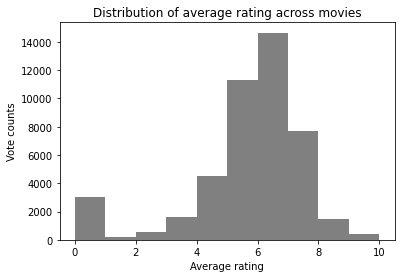

In [ ]:
import matplotlib.pyplot as plt

plt.hist(vote_averages, bins = 10, color="grey")
plt.title('Distribution of average rating across movies')
plt.xlabel('Average rating')
plt.ylabel('Vote counts')

plt.show()

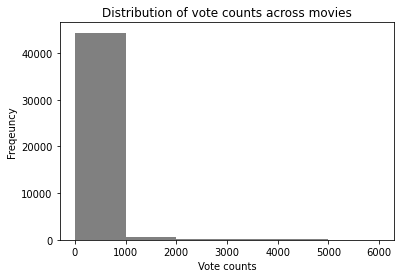

In [ ]:
plt.hist(vote_counts, range=[0, 6000], bins = 6,color="grey")
plt.title('Distribution of vote counts across movies')
plt.xlabel('Vote counts')
plt.ylabel('Freqeuncy')

plt.show()

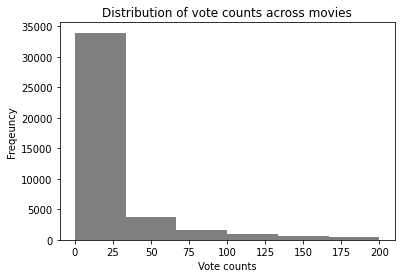

In [ ]:
plt.hist(vote_counts, range=[0, 200], bins = 6,color="grey")
plt.title('Distribution of vote counts across movies')
plt.xlabel('Vote counts')
plt.ylabel('Freqeuncy')

plt.show()

In [ ]:
vote_averages.describe()

count    45460.000000
mean         5.244897
std          1.866957
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: vote_average, dtype: float64

In [ ]:
vote_counts.describe()   

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

* The next step, we need to determine an appropriate value for m, the minimum votes required to be listed in the chart.

* We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [ ]:
m = vote_counts.quantile(0.95)
# m = 434, we going to need minimum of 434 votes for a specific movie, to be showed in the list

In [ ]:
# Pre-processing step for getting year from date by splliting it using '-'
import numpy as np

md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
md['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461     NaT
45462    2011
45463    2003
45464    1917
45465    2017
Name: year, Length: 45466, dtype: object

In [ ]:
qualified = md[(md['vote_count'] >= m) & 
               (md['vote_count'].notnull()) & 
               (md['vote_average'].notnull())][['title', 
                                                'year', 
                                                'vote_count', 
                                                'vote_average', 
                                                'popularity', 
                                                'genres']]

qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

Can do lot of descriptive stats here....what is most common year, genre in qualified movies....

In [ ]:
q_genres = qualified['genres']


Saved in csv file and made visulaization in doc..

* Therefore, to qualify to be considered for the chart, a movie has to have at least 434 votes on TMDB.
* We also see that the average rating for a movie on TMDB is 5.244 on a scale of 10.
* Here, only 2274 movies are qualify to be on our chart.

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [ ]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

**Top Movies**

In [ ]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


* We see that three Christopher Nolan Films, Inception, The Dark Knight and Interstellar occur at the very top of our chart.
* The chart also indicates a strong bias of TMDB Users towards particular genres and directors.


* Let us now construct our function that builds charts for particular genres.
* For this, we relax our default conditions to the 85th percentile instead of 95.

In [ ]:
s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = md.drop('genres', axis=1).join(s)   #genre joined at the end...
gen_md.head(3).transpose()

,0,0,0
adult,FALSE,FALSE,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000,30000000,30000000
homepage,http://toystory.disney.com/toy-story,http://toystory.disney.com/toy-story,http://toystory.disney.com/toy-story
id,862,862,862
imdb_id,tt0114709,tt0114709,tt0114709
original_language,en,en,en
original_title,Toy Story,Toy Story,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ..."
popularity,21.9469,21.9469,21.9469


In [ ]:
def build_chart(genre, percentile=0.85):   # selected genre is passed as a parameter

##repeat everything as before but just for that specific genre..
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & 
                   (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: 
                        (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C),
                        axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

Let us see our method in action by displaying the **Top 15 Romance Movies** (Romance almost didn't feature at all in our Generic Top Chart despite being one of the most popular movie genres).

In [ ]:
build_chart('Romance').head(15)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457,8.565285
351,Forrest Gump,1994,8147,8,48.3072,7.971357
876,Vertigo,1958,1162,8,18.2082,7.811667
40251,Your Name.,2016,1030,8,34.461252,7.789489
883,Some Like It Hot,1959,835,8,11.8451,7.745154
1132,Cinema Paradiso,1988,834,8,14.177,7.744878
19901,Paperman,2012,734,8,7.19863,7.713951
37863,Sing Street,2016,669,8,10.672862,7.689483
882,The Apartment,1960,498,8,11.9943,7.599317
38718,The Handmaiden,2016,453,8,16.727405,7.566166


**Content based recommendation system**

In [ ]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [ ]:
## Pre-processing step

def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
md['id'] = md['id'].apply(convert_int)
md[md['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year


In [ ]:
md = md.drop([19730, 29503, 35587])

In [ ]:
md['id'] = md['id'].astype('int')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9099, 25)

In [ ]:
smd.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,FALSE,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,FALSE,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


We have **9099 movies** available in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

**Content based recommendation system : Using movie description and taglines**
* Let us first try to build a recommender using movie descriptions and taglines.
* We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [ ]:
tfidf_matrix.shape

(9099, 268123)

* Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.

* Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  #9099 * 9099 (similarity between movies)

In [ ]:
cosine_sim[1]

array([0.00680476, 1.        , 0.01531062, ..., 0.00357057, 0.00762326,
       0.        ])

9219

* We now have a pairwise cosine similarity matrix for all the movies in our dataset.
* The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])


In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [ ]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

* We see that for **The Dark Knight**, our system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations.

* But unfortunately, that is all this system can do at the moment.

* This is not of much use to most people as it doesn't take into considerations very important features such as cast, crew, director and genre, which determine the rating and the popularity of a movie.

* Someone who liked The Dark Knight probably likes it more because of Nolan and would hate Batman Forever and every other substandard movie in the Batman Franchise.


* Therefore, we are going to use much more suggestive metadata than Overview and Tagline.
* In the next subsection, we will build a more sophisticated recommender that takes **genre, keywords, cast and crew** into consideration.

**Content based RS : Using movie description, taglines, keywords, cast, director and genres**
* To build our standard metadata based content recommender, we will need to merge our current dataset with the crew and the keyword datasets.
* Let us prepare this data as our first step.

In [ ]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [ ]:
md.shape

(45463, 25)

In [ ]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 28)

We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:

**1. Crew:** From the crew, we will only pick the director as our feature since the others don't contribute that much to the feel of the movie.

**2. Cast:** Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list.

In [ ]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
smd['director'] = smd['crew'].apply(get_director)
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

* Approach to building the recommender is going to be extremely hacky.

* What I plan on doing is creating a metadata dump for every movie which consists of genres, director, main actors and keywords.

* I then use a Count Vectorizer to create our count matrix

* The remaining steps are similar to what we did earlier: we calculate the cosine similarities and return movies that are most similar.

These are steps I follow in the preparation of my genres and credits data:

1. **Strip Spaces and Convert to Lowercase** from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki.

2. **Mention Director 2 times** to give it more weight relative to the entire cast.

In [ ]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

Keywords

* We will do a small amount of pre-processing of our keywords before putting them to any use.
* we calculate the frequency of every keyword that appears in the dataset.

In [ ]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

* Keywords occur in frequencies ranging from 1 to 610.
* We do not have any use for keywords that occur only once.
* Therefore, these can be safely removed.
* Finally, we will convert every word to its stem so that words such as Dogs and Dog are considered the same.

In [ ]:
s = s[s > 1]

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# Just an example
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [ ]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [ ]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [ ]:
smd.head(3).transpose()

,0,1,2
adult,FALSE,FALSE,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


In [ ]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

* We will reuse the get_recommendations function that we had written earlier.
* Since our cosine similarity scores have changed, we expect it to give us different (and probably better) results.
* Let us check for The Dark Knight again and see what recommendations I get this time around.

In [ ]:
get_recommendations('The Dark Knight').head(10)

8031         The Dark Knight Rises
6218                 Batman Begins
6623                  The Prestige
2085                     Following
7648                     Inception
4145                      Insomnia
3381                       Memento
8613                  Interstellar
7659    Batman: Under the Red Hood
1134                Batman Returns
Name: title, dtype: object

* We are much more satisfied with the results I get this time around. The recommendations seem to have recognized other Christopher Nolan movies (due to the high weightage given to director) and put them as top recommendations.

**Improvment**

* We can of course experiment on this engine by trying out different weights for our features (directors, actors, genres), limiting the number of keywords that can be used in the soup, weighing genres based on their frequency, only showing movies with the same languages, etc.

In [ ]:
get_recommendations('Mean Girls').head(10)

3319               Head Over Heels
4763                 Freaky Friday
1329              The House of Yes
6277              Just Like Heaven
7905         Mr. Popper's Penguins
7332    Ghosts of Girlfriends Past
6959     The Spiderwick Chronicles
8883                      The DUFF
6698         It's a Boy Girl Thing
7377       I Love You, Beth Cooper
Name: title, dtype: object

**Add Popularity and Ratings**
* One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity. It is true that Batman and Robin has a lot of similar characters as compared to The Dark Knight but
it was a terrible movie that shouldn't be recommended to anyone.

* Therefore, we will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

* I will take the top 25 movies based on similarity scores and calculate the vote of the 60th percentile movie. Then, using this as the value of $m$, we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [ ]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & 
                       (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [ ]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,year,wr
7648,Inception,14075,8,2010,7.917588
8613,Interstellar,11187,8,2014,7.897107
6623,The Prestige,4510,8,2006,7.758148
3381,Memento,4168,8,2000,7.740175
8031,The Dark Knight Rises,9263,7,2012,6.921448
6218,Batman Begins,7511,7,2005,6.904127
1134,Batman Returns,1706,6,1992,5.846862
132,Batman Forever,1529,5,1995,5.054144
9024,Batman v Superman: Dawn of Justice,7189,5,2016,5.013943
1260,Batman & Robin,1447,4,1997,4.287233


***CF based recommendation system***

**Our content based engine suffers from some severe limitations.**

* It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.
* Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who (s)he is.
* Therefore, in this section, we will use Collaborative Filtering to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.
* We will not be implementing Collaborative Filtering from scratch. Instead, I will use the Surprise library that used extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.


In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 6.5MB 3.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678573 sha256=61aef1ed6177c59dd4e5beef43db0340cfa43370365c5c9115591e7e3e818550
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD
# surprise reader API to read the dataset
reader = Reader()

In [ ]:
from surprise.model_selection import cross_validate

# Load the dataset (download it if needed)
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=2.542645881457942, details={'was_impossible': False})

* For movie with ID 302, we get an estimated prediction of 2.686. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have perceive the movie.

# Hybrid recommendation system
* In this section, will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

* Input: User ID and the Title of a Movie

* Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
id_map = pd.read_csv('/content/drive/Shared drives/575/Data/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')

In [ ]:
indices_map = id_map.set_index('id')

In [ ]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    movie_id = id_map.loc[title]['movieId']
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_date', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [ ]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,release_date,id,est
1011,The Terminator,4208.0,7.4,10/26/1984,218,3.304217
522,Terminator 2: Judgment Day,4274.0,7.7,7/1/1991,280,3.221958
974,Aliens,3282.0,7.7,7/18/1986,679,3.025422
922,The Abyss,822.0,7.1,8/9/1989,2756,2.928240
2014,Fantastic Planet,140.0,7.6,5/1/1973,16306,2.893895
8658,X-Men: Days of Future Past,6155.0,7.5,5/15/2014,127585,2.853312
8401,Star Trek Into Darkness,4479.0,7.4,5/5/2013,54138,2.784387
1621,Darby O'Gill and the Little People,35.0,6.7,6/29/1959,18887,2.715294
1668,Return from Witch Mountain,38.0,5.6,3/10/1978,14822,2.713074
1376,Titanic,7770.0,7.5,11/18/1997,597,2.675072


In [ ]:
hybrid(5000, 'Avatar')

,title,vote_count,vote_average,release_date,id,est
1011,The Terminator,4208.0,7.4,10/26/1984,218,3.964887
522,Terminator 2: Judgment Day,4274.0,7.7,7/1/1991,280,3.954420
974,Aliens,3282.0,7.7,7/18/1986,679,3.910655
8401,Star Trek Into Darkness,4479.0,7.4,5/5/2013,54138,3.777886
8658,X-Men: Days of Future Past,6155.0,7.5,5/15/2014,127585,3.755307
2014,Fantastic Planet,140.0,7.6,5/1/1973,16306,3.702588
922,The Abyss,822.0,7.1,8/9/1989,2756,3.672988
1621,Darby O'Gill and the Little People,35.0,6.7,6/29/1959,18887,3.651393
1668,Return from Witch Mountain,38.0,5.6,3/10/1978,14822,3.615288
344,True Lies,1138.0,6.8,7/14/1994,36955,3.533051
